In [1]:
import CloudClassificationDatasetCNN
import torch
import matplotlib.pyplot as plt
import torchvision.transforms.v2 as v2
import torch.nn as nn
import torch.optim as optim
import numpy as np
batch_size = 7

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


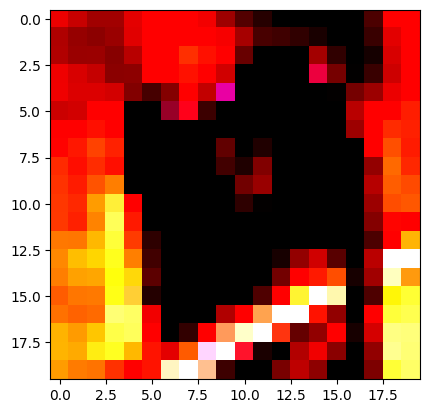

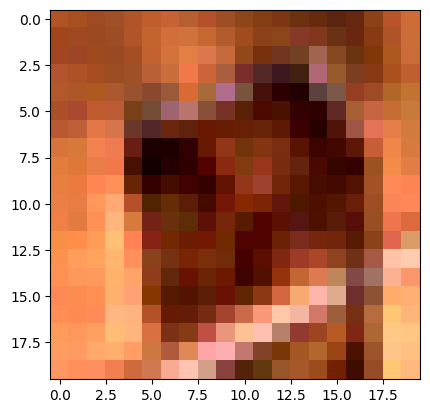

tensor([1, 0])


In [3]:
transforms = v2.Compose([
    v2.RandomHorizontalFlip(),
    v2.RandomVerticalFlip(),
])

train_dataset = CloudClassificationDatasetCNN.CloudClassificationDataset("data\\2A-netcdfs-cropped-from-nuria","data\\skogs_json_train.npy",channels=("b04","b03","b02"),transform=transforms)
val_dataset = CloudClassificationDatasetCNN.CloudClassificationDataset("data\\2A-netcdfs-cropped-from-nuria","data\\skogs_json_val.npy",channels=("b04","b03","b02"),transform=transforms)

validation_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
training_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Creates an iterator and plots the pictures
it = iter(training_loader)
images, labels, img_disp = next(it)


plt.figure()
plt.imshow(images[0][:3].permute(1,2,0))
plt.show()

plt.figure()
plt.imshow(img_disp[0][:3].permute(1,2,0))
plt.show()

print(labels[0])

In [5]:
class LeNet(nn.Module):
	def __init__(self, numChannels, classes):
		# call the parent constructor
		super(LeNet, self).__init__()

		self.drop = nn.Dropout(0.9)

		# initialize first set of CONV => RELU => POOL layers
		self.conv1 = nn.Conv2d(in_channels=numChannels, out_channels=20,
			kernel_size=(5, 5))
		self.relu1 = nn.ReLU()
		self.maxpool1 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
		# initialize second set of CONV => RELU => POOL layers
		self.conv2 = nn.Conv2d(in_channels=20, out_channels=50,
			kernel_size=(5, 5))
		self.relu2 = nn.ReLU()
		self.maxpool2 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
		# initialize first (and only) set of FC => RELU layers
		self.fc1 = nn.Linear(in_features=200, out_features=50)
		self.relu3 = nn.ReLU()
		# initialize our softmax classifier
		self.fc2 = nn.Linear(in_features=50, out_features=classes)
		self.logSoftmax = nn.LogSoftmax(dim=1)

	def forward(self, x):
		# pass the input through our first set of CONV => RELU =>
		# POOL layers
		x = self.conv1(x)
		x = self.relu1(x)
		x = self.maxpool1(x)
		# pass the output from the previous layer through the second
		# set of CONV => RELU => POOL layers
		x = self.conv2(x)
		x = self.relu2(x)
		x = self.maxpool2(x)
		# flatten the output from the previous layer and pass it
		# through our only set of FC => RELU layers
		x = torch.flatten(x, 1)
		x = self.fc1(x)
		x = self.relu3(x)
		# pass the output to our softmax classifier to get our output
		# predictions
		output = self.fc2(x)
		# return the output predictions
		return output

Epoch: 0 batch_nr: 0 Time: 0.2968965999898501 Time_diff: 0.2968981000012718 loss: 1.0249282121658325
Epoch: 0 batch_nr: 13 Time: 2.037333199987188 Time_diff: 0.14570680001634173 loss: 0.9422583729028702
Epoch: 0 batch_nr: 26 Time: 3.720492499996908 Time_diff: 0.12464940000791103 loss: 0.9283198868786847

 New best loss: 0.6831581538373773


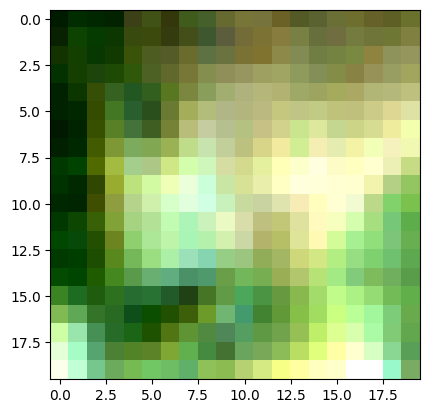

tensor([0, 1])
tensor([0.0939, 0.9061])
Epoch: 1 batch_nr: 12 Time: 8.188592799997423 Time_diff: 0.12742240002262406 loss: 0.713789104269101
Epoch: 1 batch_nr: 25 Time: 9.783915899985004 Time_diff: 0.1181833999871742 loss: 0.712368871156986

 New best loss: 0.48651167208498175


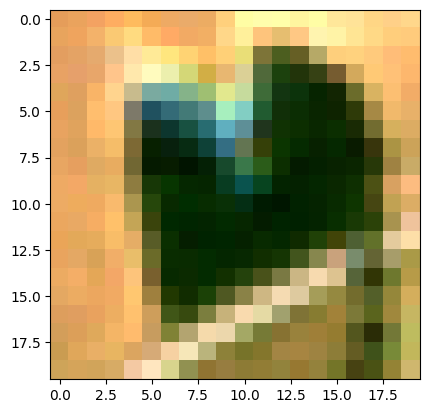

tensor([0, 1])
tensor([0.6411, 0.3589])
Epoch: 2 batch_nr: 11 Time: 13.974914899998112 Time_diff: 0.12044430000241846 loss: 0.46137849365671474
Epoch: 2 batch_nr: 24 Time: 15.578954500000691 Time_diff: 0.11952630002633668 loss: 0.5572742834687233
Epoch: 2 batch_nr: 37 Time: 17.0465859999822 Time_diff: 0.02071419998537749 loss: 0.5860306301007145

 New best loss: 0.4844685305248607


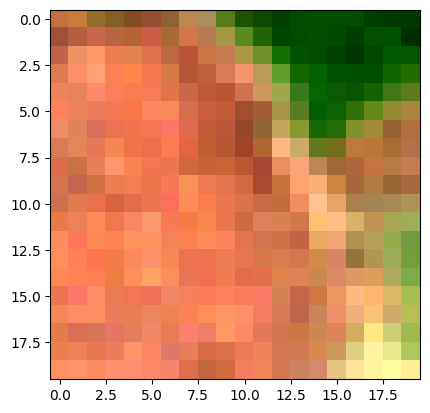

tensor([1, 0])
tensor([0.6809, 0.3191])
Epoch: 3 batch_nr: 10 Time: 19.87155049998546 Time_diff: 0.1148471999913454 loss: 0.42390448532321234
Epoch: 3 batch_nr: 23 Time: 21.393525199993746 Time_diff: 0.12043780001113191 loss: 0.5327562484890223
Epoch: 3 batch_nr: 36 Time: 22.934804499993334 Time_diff: 0.11418309999862686 loss: 0.5454641673210505
new val loss: 0.5263051329688593
Epoch: 4 batch_nr: 9 Time: 25.33535869998741 Time_diff: 0.11648430000059307 loss: 0.28830271810293195
Epoch: 4 batch_nr: 22 Time: 26.844777099991916 Time_diff: 0.11531490000197664 loss: 0.4725196102391119
Epoch: 4 batch_nr: 35 Time: 28.362436499999603 Time_diff: 0.11826940000173636 loss: 0.46492636224461925
new val loss: 0.5301247022368691
Epoch: 5 batch_nr: 8 Time: 30.74338070000522 Time_diff: 0.12073070000042208 loss: 0.39593763483895195
Epoch: 5 batch_nr: 21 Time: 32.31486539999605 Time_diff: 0.1161971999972593 loss: 0.46254977787082846
Epoch: 5 batch_nr: 34 Time: 33.82743179998943 Time_diff: 0.11730370001168

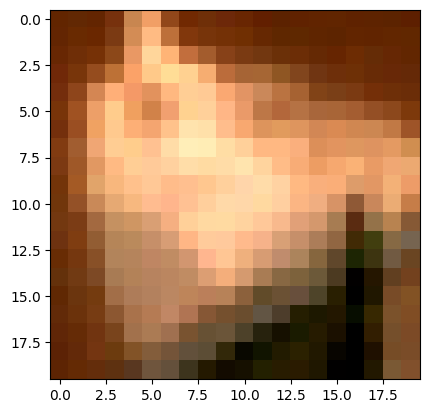

tensor([0, 1])
tensor([0.9752, 0.0248])
Epoch: 9 batch_nr: 4 Time: 52.732834800001 Time_diff: 0.20611119997920468 loss: 0.19187155812978746
Epoch: 9 batch_nr: 17 Time: 54.362144599988824 Time_diff: 0.12125430000014603 loss: 0.4048379063606262
Epoch: 9 batch_nr: 30 Time: 55.90829849999864 Time_diff: 0.1122361000161618 loss: 0.37128569137665535
new val loss: 0.46285428309982474
Epoch: 10 batch_nr: 3 Time: 58.30934409998008 Time_diff: 0.11764139999286272 loss: 0.3161190189421177
Epoch: 10 batch_nr: 16 Time: 59.85027450000052 Time_diff: 0.11530860001221299 loss: 0.3930135641027899
Epoch: 10 batch_nr: 29 Time: 61.37940669999807 Time_diff: 0.11661730002379045 loss: 0.4212977528572083
new val loss: 0.45603303475813434
Epoch: 11 batch_nr: 2 Time: 63.78018209998845 Time_diff: 0.11828100000275299 loss: 0.31893740097681683
Epoch: 11 batch_nr: 15 Time: 65.3111668000056 Time_diff: 0.11723209999036044 loss: 0.5505475243553519
Epoch: 11 batch_nr: 28 Time: 66.81457089999458 Time_diff: 0.12335760000860

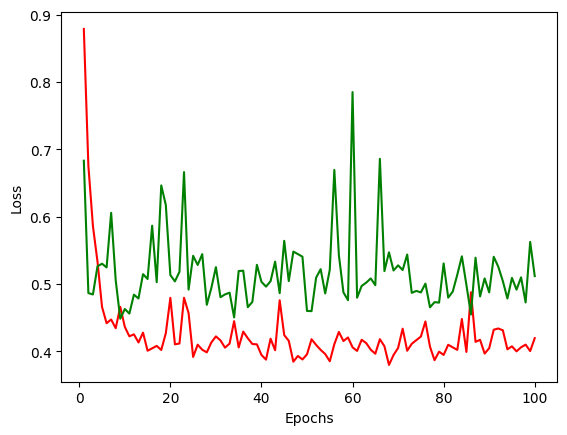

In [12]:
import copy
from time import perf_counter

epochs=100

def train_model(train_loader, val_loader, model, criterion, optimizer, scheduler):
    start_time = perf_counter()
    time = 0

    best_loss = float('inf')

    train_loss = []
    val_loss = []
    for epoch in range(epochs):
        avg_loss_list = []
        for batch_nr, (images,labels,_) in enumerate(train_loader):
            
            #Forward pass
            predictions = model(images)
            loss = criterion(predictions,labels.float())
            avg_loss_list.append(loss.item())
            
            if((batch_nr+epoch)%13==0):
                print("Epoch:",epoch,"batch_nr:",batch_nr,"Time:",perf_counter()-start_time,"Time_diff:",perf_counter()-start_time-time,"loss:",(sum(avg_loss_list)/len(avg_loss_list)))
            time=perf_counter()-start_time

            #Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # Update learning rate
            scheduler.step()

        avg_val_loss_list = []
        #Grabs next iterator batch, restarts if at end of iterator
        for batch_nr, (images_valid,labels_valid,img_disp_valid) in enumerate(val_loader):
        #Forward - Validation
            predictions = model(images_valid)
            v_loss = criterion(predictions,labels_valid.float())
            avg_val_loss_list.append(v_loss.item())

        
        train_loss.append((sum(avg_loss_list)/len(avg_loss_list)))
        val_loss.append((sum(avg_val_loss_list)/len(avg_val_loss_list)))

        #Finds best model
        if (val_loss[-1]<best_loss):
            best_loss=val_loss[-1]
            best_model = copy.deepcopy(model)
            torch.save(model, 'CNN1b.pt')
            print("\n New best loss:",best_loss)
            plt.figure()
            plt.imshow(img_disp_valid[0][:3].permute(1,2,0))
            plt.show()
            
            print(labels[0])
            print(nn.Softmax(dim=1)(predictions.detach())[0])
        else:
            print("new val loss:",val_loss[-1])

    
    plt.plot(range(1,epochs+1),train_loss, color='r', label='losses')
    plt.plot(range(1,epochs+1),val_loss, color='g', label='losses_valid')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

    return best_model

    

model = LeNet(3,2)
optimizer = optim.Adam(model.parameters(),lr=3e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=8, gamma=0.9)
criterion = nn.CrossEntropyLoss(weight=torch.Tensor([1.0,2.611111111111111])) #weight=torch.Tensor([1.0,2.611111111111111])

best_model=train_model(training_loader,validation_loader,model,criterion,optimizer,scheduler)


In [14]:
test_dataset = CloudClassificationDatasetCNN.CloudClassificationDataset("data\\2A-netcdfs-cropped-from-nuria","data\\skogs_json_test.npy",channels=("b04","b03","b02"),transform=transforms) #,"b01","b05","b06","b07","b08","b09","b11","b12"

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
model = torch.load("CNN1b.pt").eval()
# Creates an iterator and plots the pictures
it = iter(test_loader)



In [50]:
cloud=0
ncloud=0
for batch_nr, (_,labels) in enumerate(training_loader):
    for label in labels:
        if torch.argmax(label).item()==0:
            ncloud+=1
        else:
            cloud+=1

print("cloud:",cloud)
print("ncloud:",ncloud)
print(max(cloud,ncloud)/cloud)
print(max(cloud,ncloud)/ncloud)

cloud: 72
ncloud: 188
2.611111111111111
1.0


In [74]:
def from_one_hot(label):
    return np.argmax(label,0)

In [18]:
CM = [[0,0],
      [0,0]]

correct=0
total=0

for batch_nr, (images,labels,_) in enumerate(test_loader):
    preds = model(images)
    preds2 = nn.Softmax(dim=1)(preds.detach())
    preds2bin = (torch.zeros(preds2.shape).scatter (1, preds2.argmax(1).unsqueeze(1), 1.0).to(torch.int64))
    for pred, label in zip(preds2bin,labels):
        total+=1
        for a_class in range(2):
            for p_class in range(2):
                if(pred[p_class].item()==1 and label[a_class].item()==1):
                    CM[a_class][p_class] += 1

print("Confusion Matrix:")
print(CM[0][0],"\t",CM[0][1])
print(CM[1][0],"\t",CM[1][1])

print()
prec = CM[0][0]/(CM[0][0]+CM[1][0])
reca = CM[0][0]/(CM[0][0]+CM[0][1])
f1 = (2*prec*reca)/(prec+reca)
acc = (CM[0][0]+CM[1][1])/total
print("precision:",prec)
print("recall:",reca)
print("f1:",f1)
print("accuracy:",acc)


Confusion Matrix:
70 	 2
6 	 22

precision: 0.9210526315789473
recall: 0.9722222222222222
f1: 0.9459459459459458
accuracy: 0.92


In [6]:
model = torch.load("CNN1b.pt").eval()

In [7]:
print(model)

LeNet(
  (drop): Dropout(p=0.9, inplace=False)
  (conv1): Conv2d(3, 20, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=200, out_features=50, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=50, out_features=2, bias=True)
  (logSoftmax): LogSoftmax(dim=1)
)
